DMML_Assignment1-Classification
Group Members: Aniket Santra - MDS202106
               Soham Biswas - MDS202147


In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import files
uploaded=files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [53]:
bnk_dt=pd.read_csv('bank-additional-full.csv', sep=';')
bnk_dt.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [54]:
bnk_dt.shape

(41188, 21)

In [55]:
bnk_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Data** **Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [56]:
cat_cols=bnk_dt.select_dtypes(include='object').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

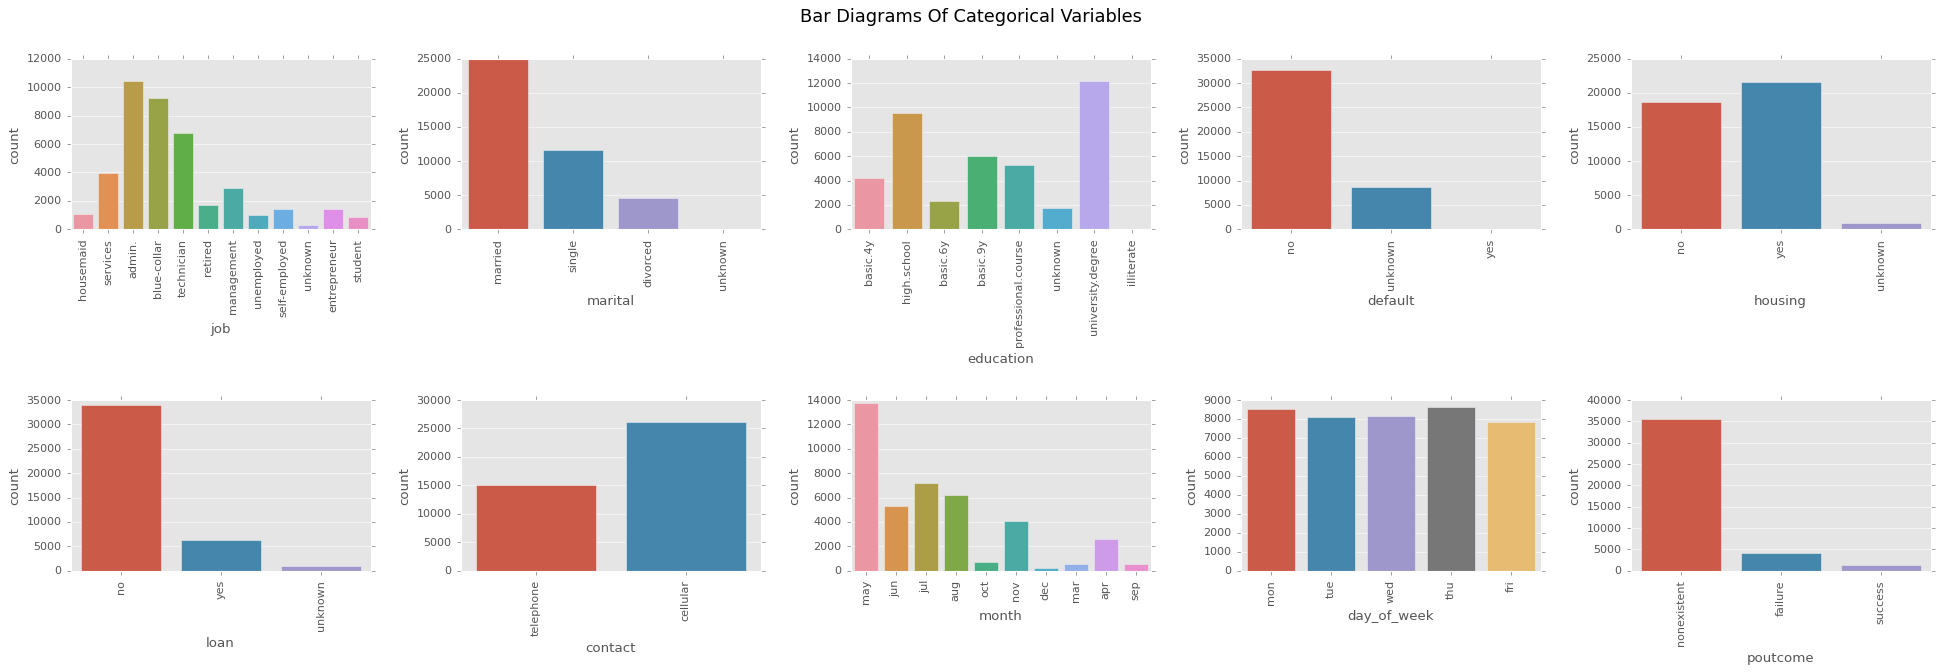

In [60]:
cat_cols2=cat_cols.drop('y')
count=1
plt.subplots(figsize=(30,8))
plt.subplots_adjust(wspace=0.3,hspace=1)
for k in cat_cols2:
  plt.subplot(2,5,count)
  plot1=sns.countplot(k, data=bnk_dt)
  plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
  count+=1
plt.suptitle('Bar Diagrams Of Categorical Variables',size=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


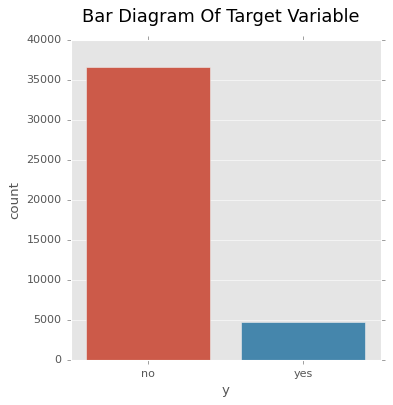

In [61]:
plt.figure(figsize=(5,5))
sns.countplot('y', data=bnk_dt)
plt.suptitle('Bar Diagram Of Target Variable',size=16)
plt.show()

In [68]:
bnk_dt['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

The number of positive response of subscription is much lesser than negative response so the data is not balanced.

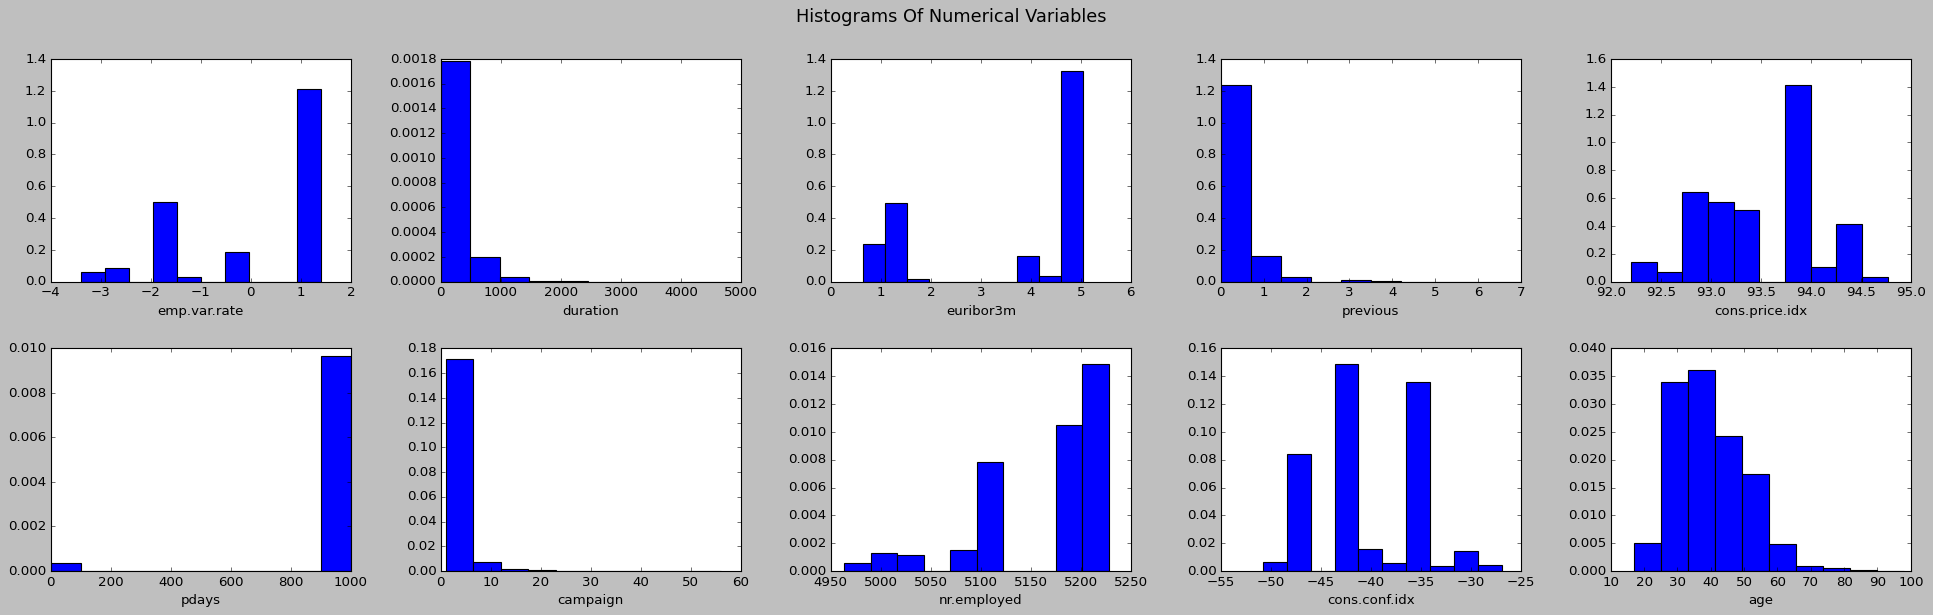

In [69]:
num_cols=list(set(bnk_dt.columns)-set(cat_cols))
count=1
plt.subplots(figsize=(30,8))
plt.subplots_adjust(wspace=0.3,hspace=0.3)
for k in num_cols:
  plt.subplot(2,5,count)
  plot1=plt.hist(k,data=bnk_dt,density=True)
  plt.xlabel(k)
  count+=1
plt.suptitle('Histograms Of Numerical Variables',size=16)
plt.show()


**Removing Rows Having Unknown Values**

In [ ]:
unknwn_cols=[]
for k in cat_cols:
  if 'unknown' in bnk_dt[k].unique():
    unknwn_cols.append(k)
unknwn_cols

In [ ]:
bnk_dt2=bnk_dt[(bnk_dt['job']!='unknown')&(bnk_dt['marital']!='unknown')&(bnk_dt['education']!='unknown')&(bnk_dt['default']!='unknown')&(bnk_dt['housing']!='unknown')&(bnk_dt['loan']!='unknown')]
bnk_dt2.shape

In [ ]:
bnk_dt2.reset_index(drop=True, inplace=True)

**Encoding Categorical Variables/Features**

In [15]:
#we are doing one hot encoding to the categorical features
cat_cols2=cat_cols.drop('y')
bnk_dt_encoded=pd.get_dummies(bnk_dt2[cat_cols2])


In [16]:
bnk_dt_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
bnk_dt3=bnk_dt2.drop(cat_cols2,axis=1)
bnk_dt3=pd.concat([bnk_dt_encoded,bnk_dt3],axis=1)

In [18]:
bnk_dt3['y']=bnk_dt2['y'].apply(lambda val: 1 if val=='yes' else 0)

**Features Selection**

In [19]:
from sklearn.feature_selection import mutual_info_classif,  SelectKBest

In [20]:
#We are using mutual information classifier to select the best features to predict our target variable
X_bnkdt=bnk_dt3.drop('y',axis=1)
Y_bnkdt=bnk_dt3['y']
X_bnkdt.shape, Y_bnkdt.shape

((30488, 57), (30488,))

In [22]:
mclas=SelectKBest(score_func=mutual_info_classif,k='all')
mclas.fit(X_bnkdt,Y_bnkdt)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x7f070e3a5950>)

In [23]:
features_score=pd.DataFrame({'score':mclas.scores_},index=X_bnkdt.columns)

In [24]:
features_score.sorted=features_score.sort_values('score', ascending=False)
features_score.sorted

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,score
euribor3m,0.080661
duration,0.077409
cons.conf.idx,0.076413
cons.price.idx,0.075291
nr.employed,0.067993
emp.var.rate,0.060892
pdays,0.034853
poutcome_success,0.033038
poutcome_nonexistent,0.020708
previous,0.020487


In [25]:
#we are selecting those features which have score>=0.001
best_features=features_score[features_score['score']>=0.001]
best_features.shape

(35, 1)

In [26]:
best_features_cols=best_features.index.values.tolist()
best_features_cols

['job_admin.',
 'job_entrepreneur',
 'job_retired',
 'job_student',
 'job_unemployed',
 'marital_single',
 'education_basic.6y',
 'education_university.degree',
 'default_no',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_jul',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_tue',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success',
 'age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

**Splitting into Train & Test Dataset**

In [70]:
target_Y=bnk_dt3['y']
feature_X=bnk_dt3[best_features_cols]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(feature_X,target_Y,test_size=0.2,random_state=42)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', Y_train.shape)
print('Shape of testing label:', Y_test.shape)

Shape of training feature: (24390, 35)
Shape of testing feature: (6098, 35)
Shape of training label: (24390,)
Shape of testing label: (6098,)


**Model Estimation**

In [87]:
def model_est(model,X_test,Y_test):
  from sklearn import metrics
  plt.style.use('classic')
  
  Y_pred=model.predict(X_test)


  ori_v_pred=pd.DataFrame()
  ori_v_pred['Original_Y']=Y_test
  ori_v_pred['Predicted_Y']=Y_pred
  ori_v_pred

  accu=metrics.accuracy_score(Y_test,Y_pred)
  prec=metrics.precision_score(Y_test,Y_pred)
  reca=metrics.recall_score(Y_test,Y_pred)
  f1=metrics.f1_score(Y_test,Y_pred)

  print(ori_v_pred.head(10))

  print(f'''The accuracy score of the Model = {accu}
      The precision of the Model = {prec} 
      The recall score of the Model = {reca}
      The F1 score of the Model = {f1}''')
  print(metrics.plot_confusion_matrix(model,X_test,Y_test,display_labels=['no','yes']))

In [50]:
import time

**Decision Tree Classifier**

       Original_Y  Predicted_Y
5533            0            0
12058           0            0
12032           1            1
29255           1            1
6830            0            0
21670           0            0
9014            1            1
8337            0            0
3068            0            1
20070           0            0
The accuracy score of the Model = 0.8781567727123647
      The precision of the Model = 0.5205479452054794 
      The recall score of the Model = 0.8136020151133502
      The F1 score of the Model = 0.634889434889435
Total time taken=0.24617385864257812


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


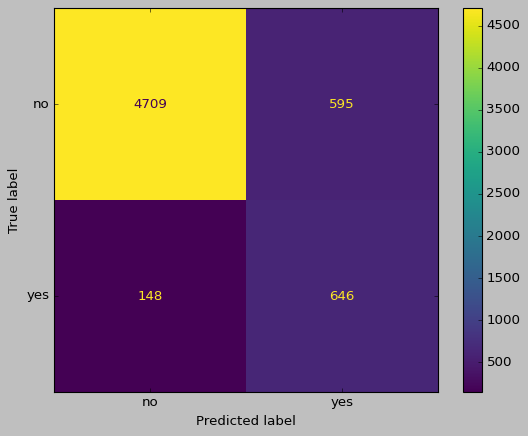

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier=DecisionTreeClassifier(max_depth=6, min_samples_leaf=20,class_weight={0:2,1:7}, random_state=42)
start_time=time.time()
dt_classifier.fit(X_train,Y_train)
model_est(dt_classifier,X_test,Y_test)
end_time=time.time()
print(f'Total time taken={end_time-start_time}')

**Random forest Classifier**

       Original_Y  Predicted_Y
5533            0            0
12058           0            0
12032           1            1
29255           1            1
6830            0            0
21670           0            0
9014            1            1
8337            0            0
3068            0            0
20070           0            0
The accuracy score of the Model = 0.8734011151197114
      The precision of the Model = 0.5082458770614693 
      The recall score of the Model = 0.853904282115869
      The F1 score of the Model = 0.637218045112782
Total time taken=1.7612495422363281


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


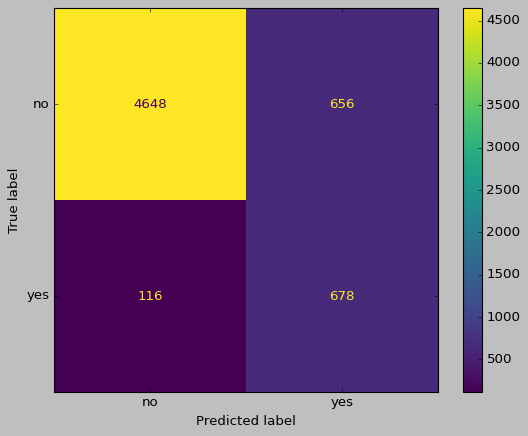

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100,max_depth=8,class_weight={0:1.4,1:6.9}, random_state=42)
start_time=time.time()
rf_classifier.fit(X_train,Y_train)
model_est(rf_classifier,X_test,Y_test)
end_time=time.time()
print(f'Total time taken={end_time-start_time}')

**Naive-Bayes Classifier**

       Original_Y  Predicted_Y
5533            0            0
12058           0            0
12032           1            0
29255           1            1
6830            0            0
21670           0            0
9014            1            0
8337            0            0
3068            0            0
20070           0            0
The accuracy score of the Model = 0.8479829452279436
      The precision of the Model = 0.42748091603053434 
      The recall score of the Model = 0.49370277078085645
      The F1 score of the Model = 0.45821157218001174
Total time taken=0.13844585418701172


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


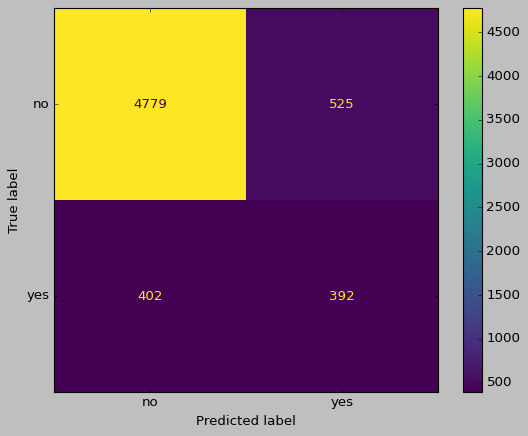

In [90]:
from sklearn.naive_bayes import GaussianNB
nb_classifier=GaussianNB()
GaussianNB()
start_time=time.time()
nb_classifier.fit(X_train,Y_train)
model_est(nb_classifier,X_test,Y_test)
end_time=time.time()
print(f'Total time taken={end_time-start_time}')